In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import imutils
import time
from bspline_path import  approximate_b_spline_path
from cubic_spline_planner import  Spline2D

In [2]:
from scipy import ndimage

In [3]:
image_dir = '/home/ivslab/DriveImage/pred_main/'

In [4]:
base_point = (530,575)
VERTICAL_CROP = 500
mask = plt.imread('mask.jpg').copy()
mask[mask>0] = 1

segment = 5
horizon = 350

In [5]:
"""

Path planning with Bezier curve.

author: Atsushi Sakai(@Atsushi_twi)

"""

import matplotlib.pyplot as plt
import numpy as np
import scipy.special

show_animation = True


def calc_4points_bezier_path(sx, sy, syaw, ex, ey, eyaw, offset):
    """
    Compute control points and path given start and end position.

    :param sx: (float) x-coordinate of the starting point
    :param sy: (float) y-coordinate of the starting point
    :param syaw: (float) yaw angle at start
    :param ex: (float) x-coordinate of the ending point
    :param ey: (float) y-coordinate of the ending point
    :param eyaw: (float) yaw angle at the end
    :param offset: (float)
    :return: (numpy array, numpy array)
    """
    dist = np.hypot(sx - ex, sy - ey) / offset
    control_points = np.array(
        [[sx, sy],
         [sx + dist * np.cos(syaw), sy + dist * np.sin(syaw)],
         [ex - dist * np.cos(eyaw), ey - dist * np.sin(eyaw)],
         [ex, ey]])

    path = calc_bezier_path(control_points, n_points=100)

    return path, control_points


def calc_bezier_path(control_points, n_points=100):
    """
    Compute bezier path (trajectory) given control points.

    :param control_points: (numpy array)
    :param n_points: (int) number of points in the trajectory
    :return: (numpy array)
    """
    traj = []
    for t in np.linspace(0, 1, n_points):
        traj.append(bezier(t, control_points))

    return np.array(traj)


def bernstein_poly(n, i, t):
    """
    Bernstein polynom.

    :param n: (int) polynom degree
    :param i: (int)
    :param t: (float)
    :return: (float)
    """
    return scipy.special.comb(n, i) * t ** i * (1 - t) ** (n - i)


def bezier(t, control_points):
    """
    Return one point on the bezier curve.

    :param t: (float) number in [0, 1]
    :param control_points: (numpy array)
    :return: (numpy array) Coordinates of the point
    """
    n = len(control_points) - 1
    return np.sum([bernstein_poly(n, i, t) * control_points[i] for i in range(n + 1)], axis=0)


def bezier_derivatives_control_points(control_points, n_derivatives):
    """
    Compute control points of the successive derivatives of a given bezier curve.

    A derivative of a bezier curve is a bezier curve.
    See https://pomax.github.io/bezierinfo/#derivatives
    for detailed explanations

    :param control_points: (numpy array)
    :param n_derivatives: (int)
    e.g., n_derivatives=2 -> compute control points for first and second derivatives
    :return: ([numpy array])
    """
    w = {0: control_points}
    for i in range(n_derivatives):
        n = len(w[i])
        w[i + 1] = np.array([(n - 1) * (w[i][j + 1] - w[i][j])
                             for j in range(n - 1)])
    return w


def curvature(dx, dy, ddx, ddy):
    """
    Compute curvature at one point given first and second derivatives.

    :param dx: (float) First derivative along x axis
    :param dy: (float)
    :param ddx: (float) Second derivative along x axis
    :param ddy: (float)
    :return: (float)
    """
    return (dx * ddy - dy * ddx) / (dx ** 2 + dy ** 2) ** (3 / 2)


def plot_arrow(x, y, yaw, length=1.0, width=0.5, fc="r", ec="k"):  # pragma: no cover
    """Plot arrow."""
    if not isinstance(x, float):
        for (ix, iy, iyaw) in zip(x, y, yaw):
            plot_arrow(ix, iy, iyaw)
    else:
        plt.arrow(x, y, length * np.cos(yaw), length * np.sin(yaw),
                  fc=fc, ec=ec, head_width=width, head_length=width)
        plt.plot(x, y)

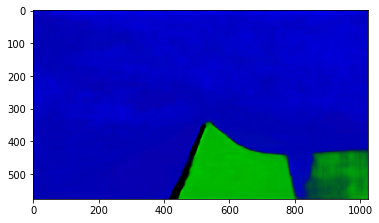

In [28]:
pred = cv2.imread(os.path.join(image_dir,'4.jpg'))
img2 = np.power(pred/float(np.max(pred)), 2)
plt.imshow(img2[...,::-1])

<Figure size 720x576 with 0 Axes>

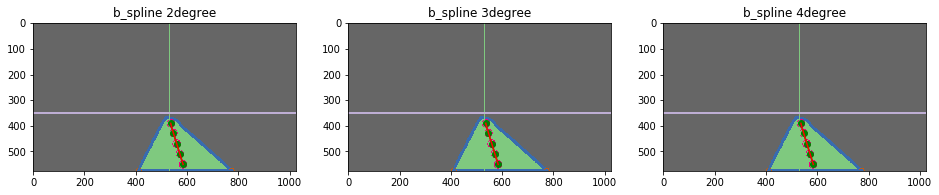

<Figure size 720x576 with 0 Axes>

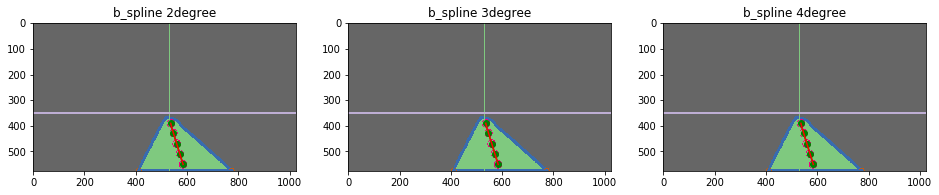

<Figure size 720x576 with 0 Axes>

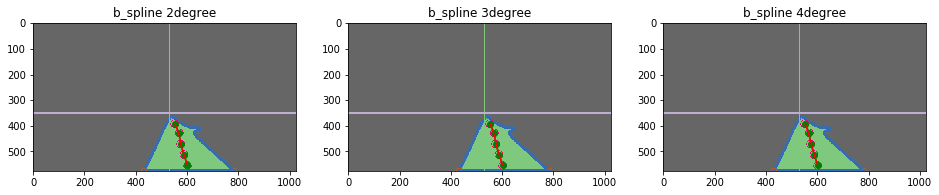

<Figure size 720x576 with 0 Axes>

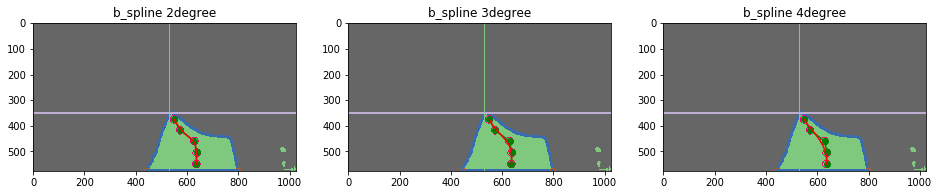

<Figure size 720x576 with 0 Axes>

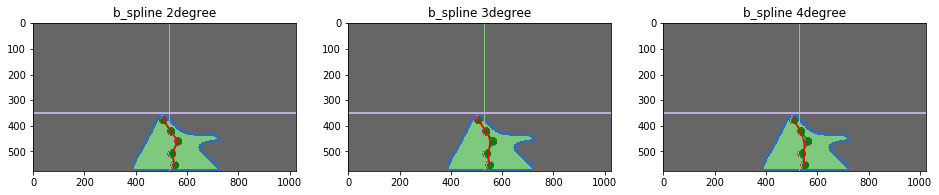

<Figure size 720x576 with 0 Axes>

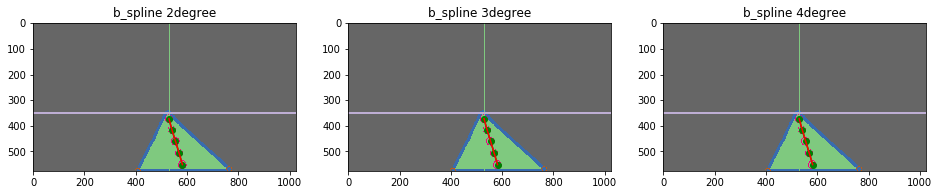

<Figure size 720x576 with 0 Axes>

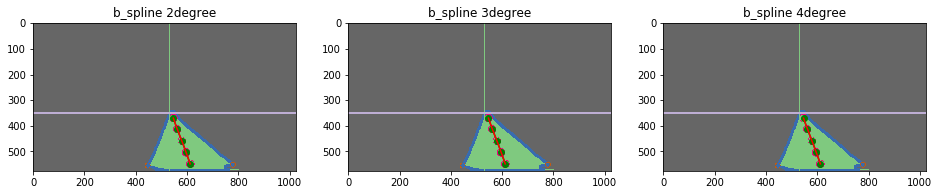

<Figure size 720x576 with 0 Axes>

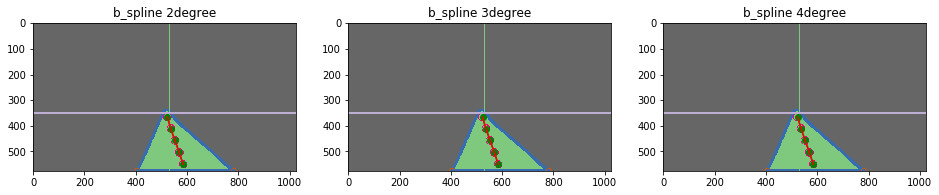

<Figure size 720x576 with 0 Axes>

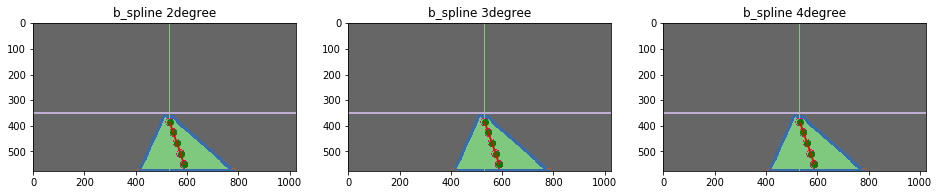

<Figure size 720x576 with 0 Axes>

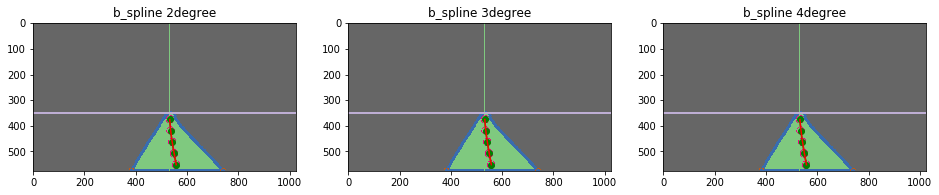

<Figure size 720x576 with 0 Axes>

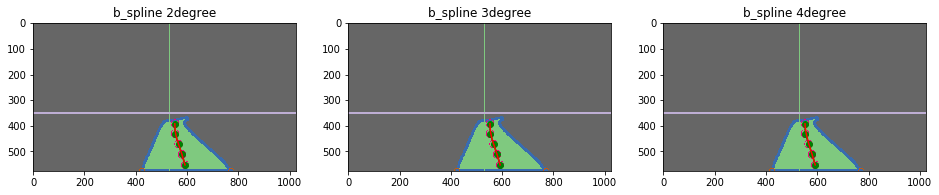

<Figure size 720x576 with 0 Axes>

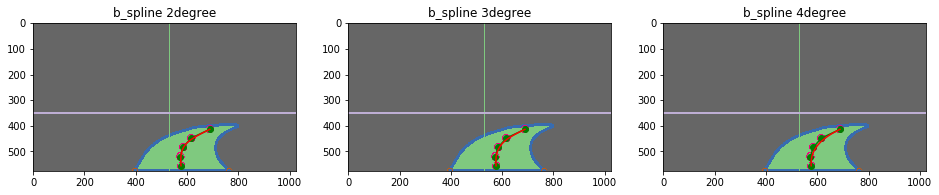

<Figure size 720x576 with 0 Axes>

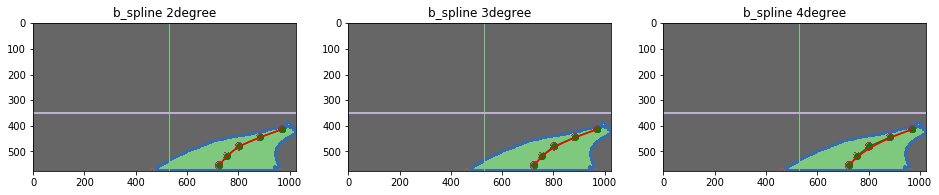

<Figure size 720x576 with 0 Axes>

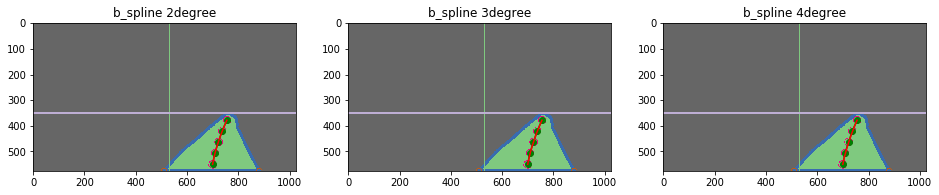

<Figure size 720x576 with 0 Axes>

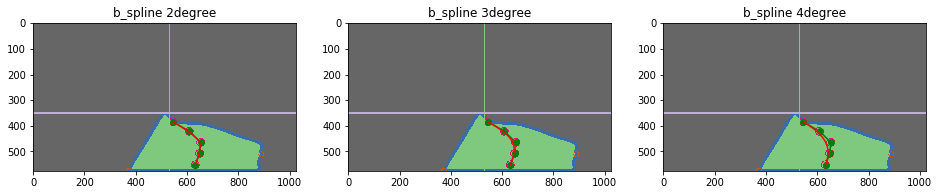

<Figure size 720x576 with 0 Axes>

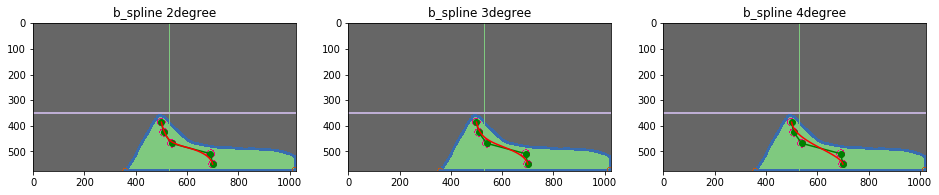

<Figure size 720x576 with 0 Axes>

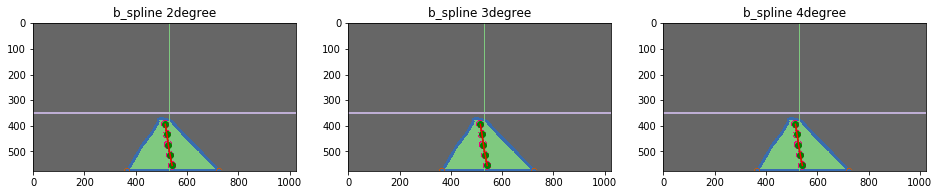

<Figure size 720x576 with 0 Axes>

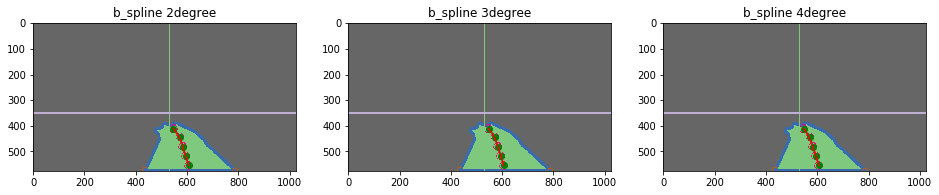

<Figure size 720x576 with 0 Axes>

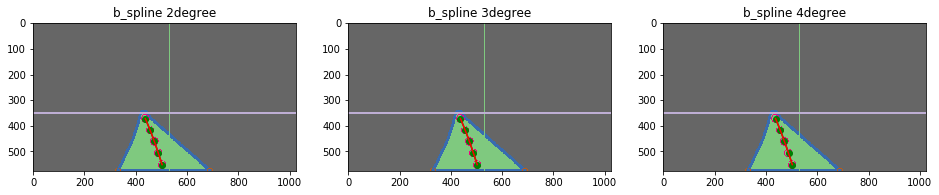

<Figure size 720x576 with 0 Axes>

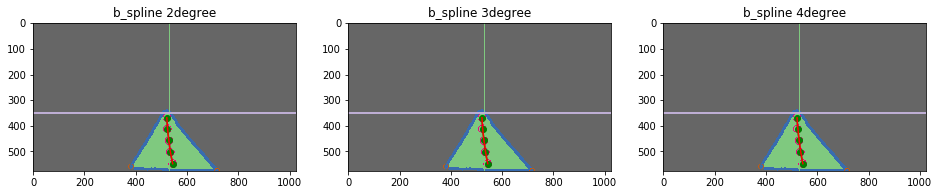

<Figure size 720x576 with 0 Axes>

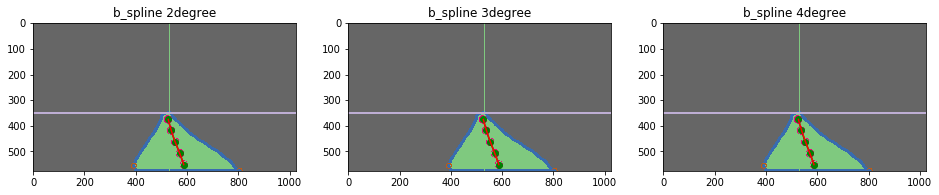

<Figure size 720x576 with 0 Axes>

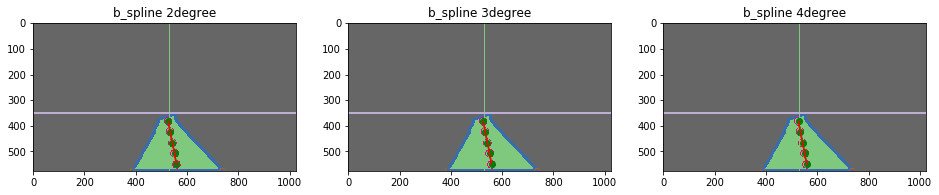

<Figure size 720x576 with 0 Axes>

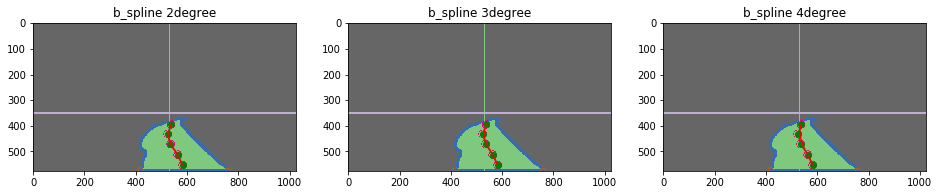

<Figure size 720x576 with 0 Axes>

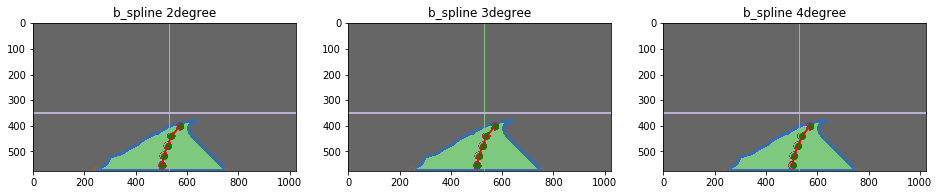

<Figure size 720x576 with 0 Axes>

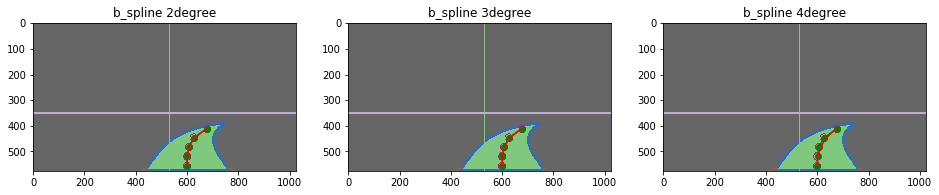

<Figure size 720x576 with 0 Axes>

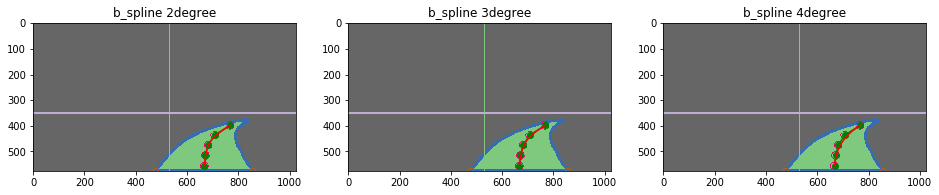

<Figure size 720x576 with 0 Axes>

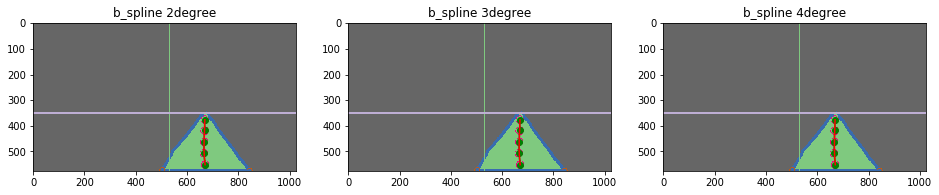

<Figure size 720x576 with 0 Axes>

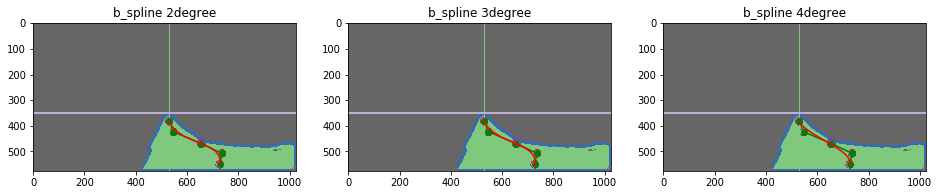

<Figure size 720x576 with 0 Axes>

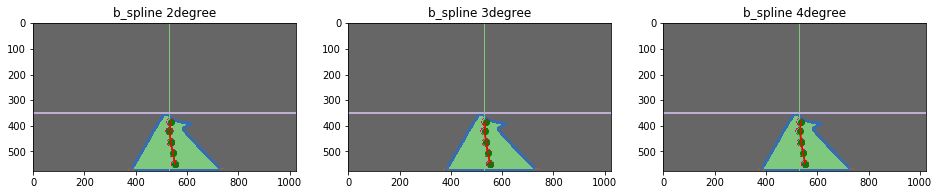

<Figure size 720x576 with 0 Axes>

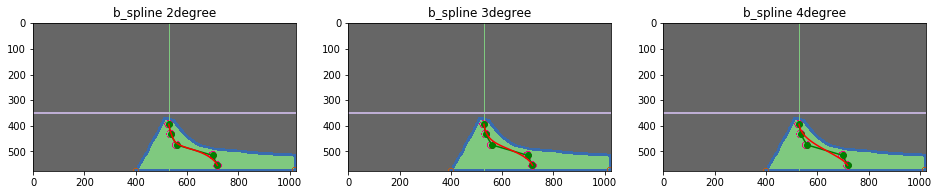

<Figure size 720x576 with 0 Axes>

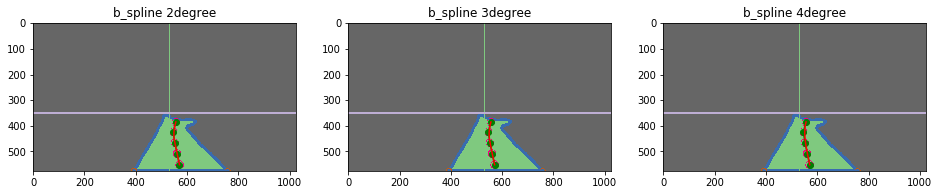

<Figure size 720x576 with 0 Axes>

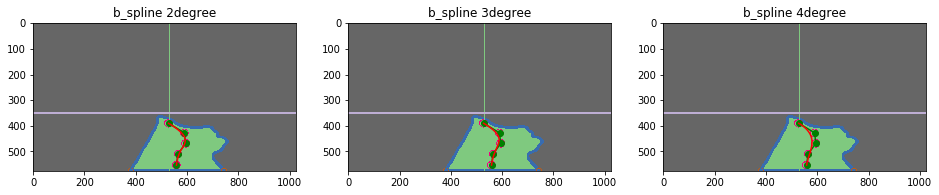

<Figure size 720x576 with 0 Axes>

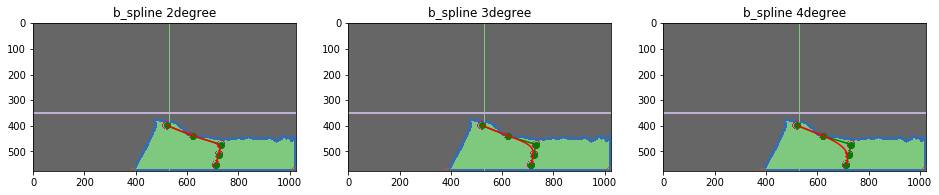

<Figure size 720x576 with 0 Axes>

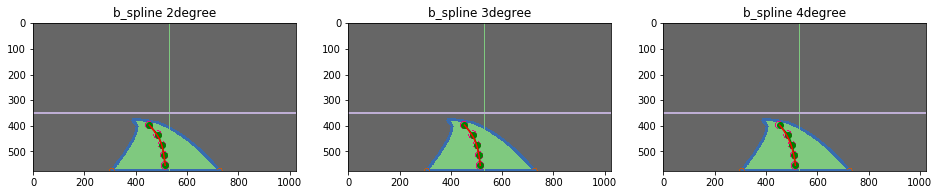

<Figure size 720x576 with 0 Axes>

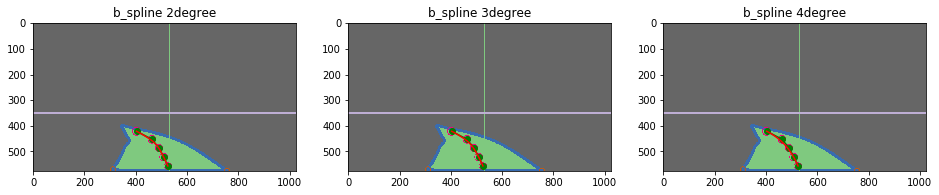

<Figure size 720x576 with 0 Axes>

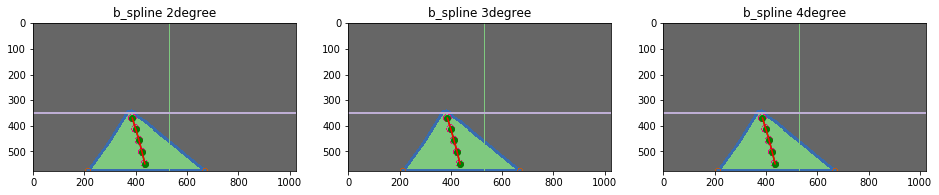

<Figure size 720x576 with 0 Axes>

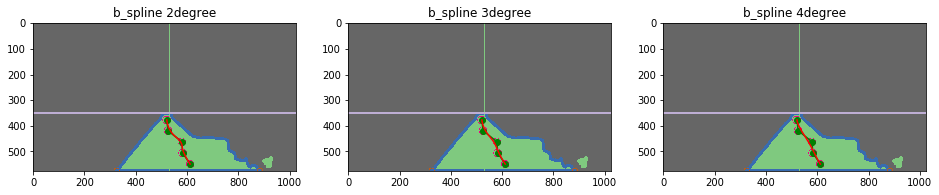

<Figure size 720x576 with 0 Axes>

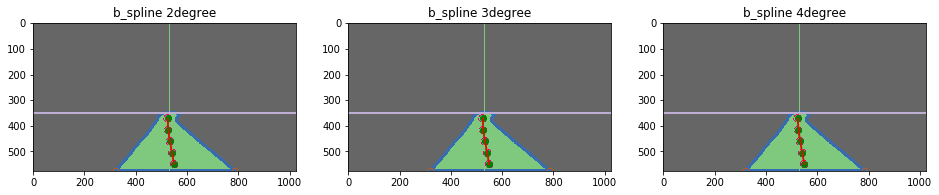

<Figure size 720x576 with 0 Axes>

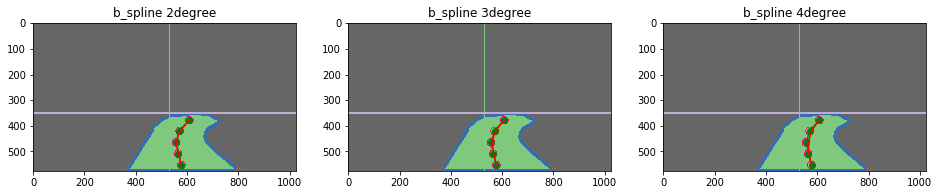

<Figure size 720x576 with 0 Axes>

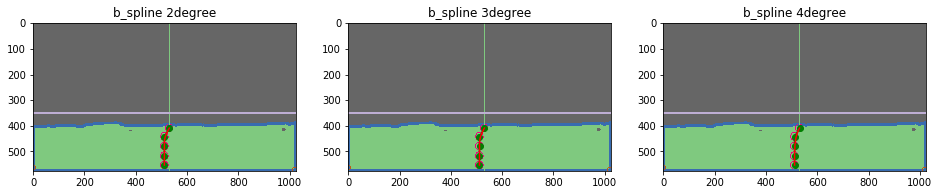

<Figure size 720x576 with 0 Axes>

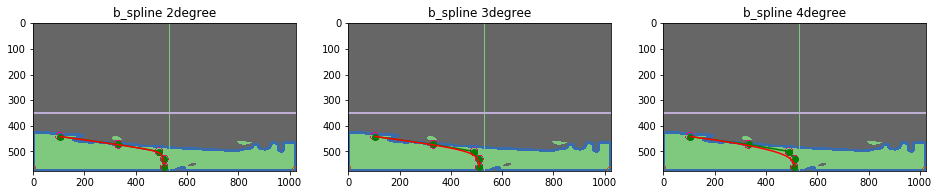

<Figure size 720x576 with 0 Axes>

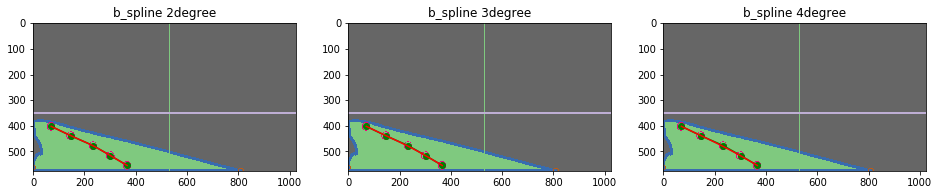

<Figure size 720x576 with 0 Axes>

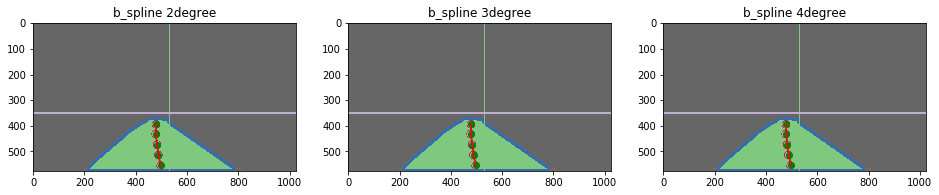

<Figure size 720x576 with 0 Axes>

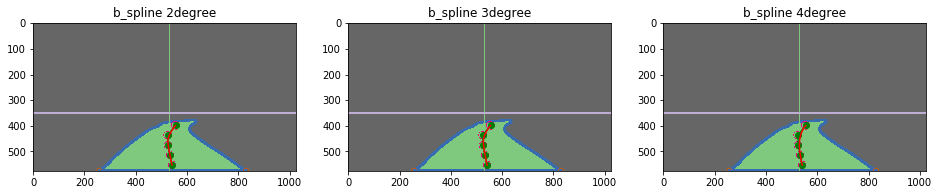

<Figure size 720x576 with 0 Axes>

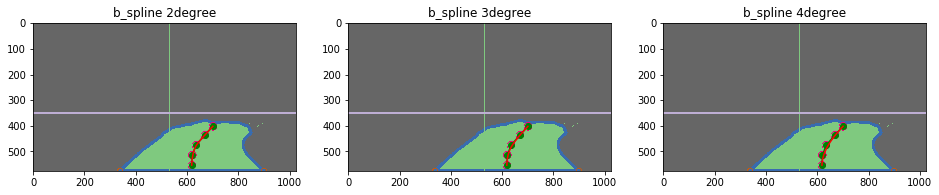

<Figure size 720x576 with 0 Axes>

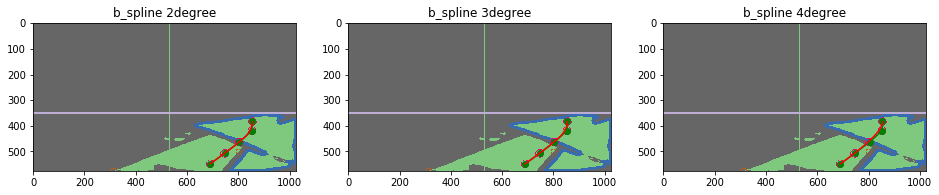

<Figure size 720x576 with 0 Axes>

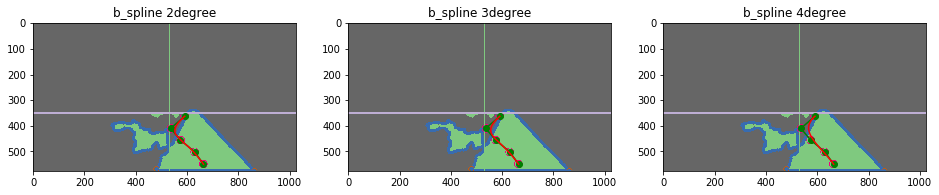

<Figure size 720x576 with 0 Axes>

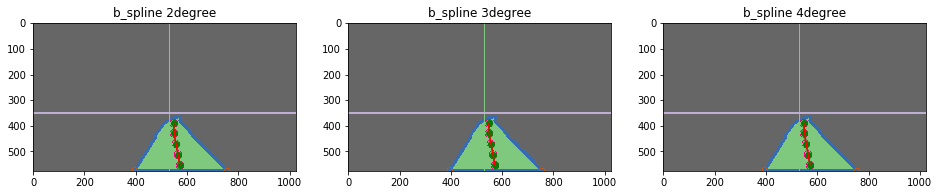

<Figure size 720x576 with 0 Axes>

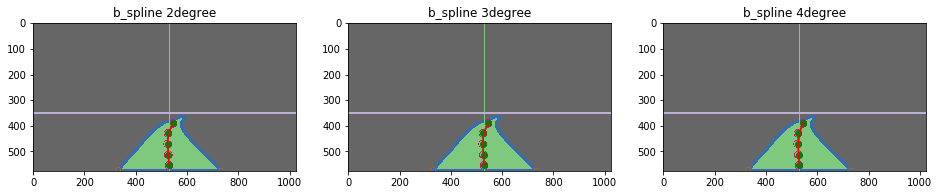

<Figure size 720x576 with 0 Axes>

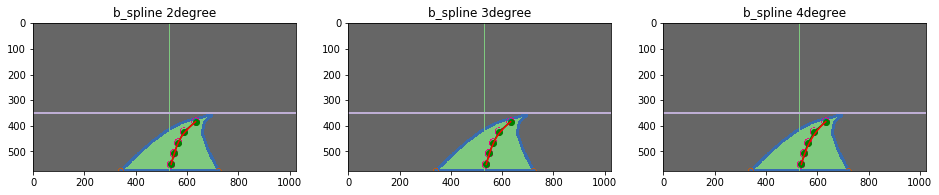

<Figure size 720x576 with 0 Axes>

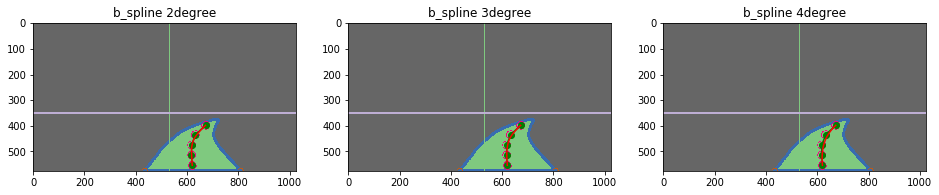

<Figure size 720x576 with 0 Axes>

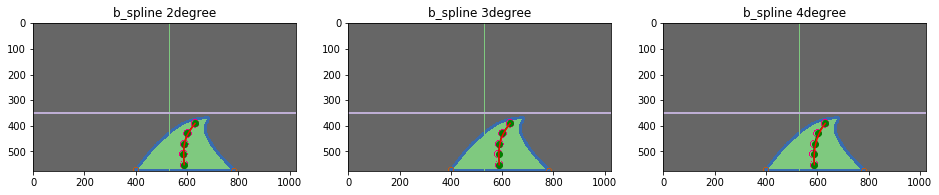

<Figure size 720x576 with 0 Axes>

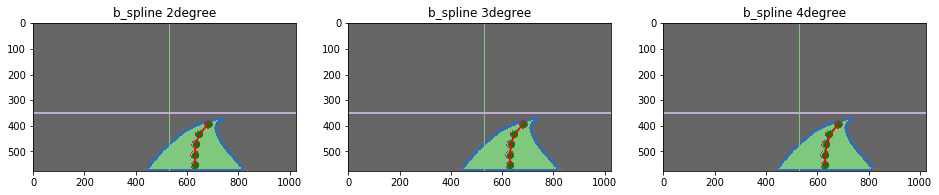

<Figure size 720x576 with 0 Axes>

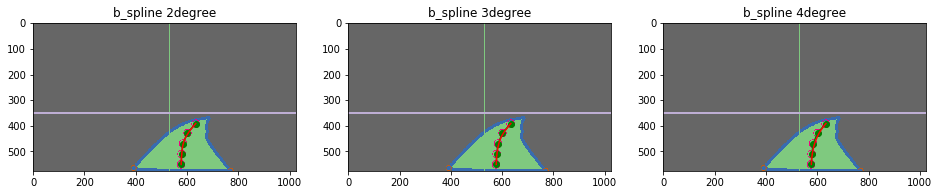

<Figure size 720x576 with 0 Axes>

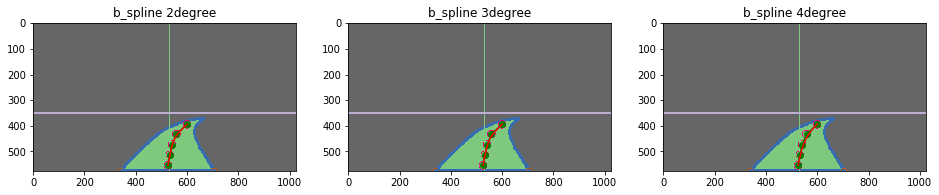

<Figure size 720x576 with 0 Axes>

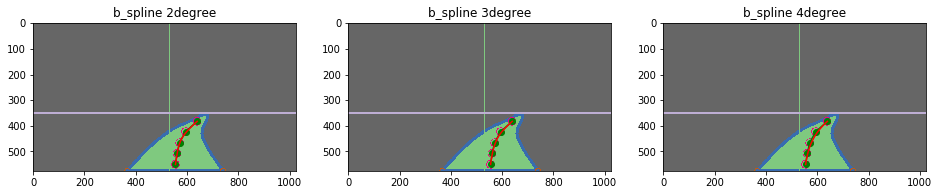

<Figure size 720x576 with 0 Axes>

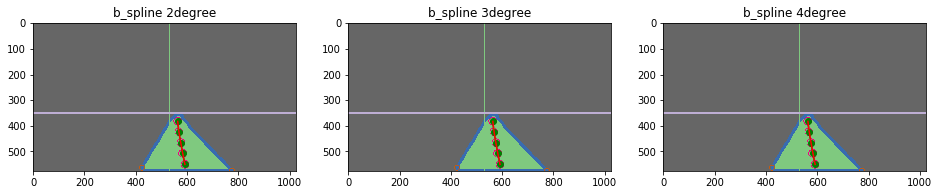

<Figure size 720x576 with 0 Axes>

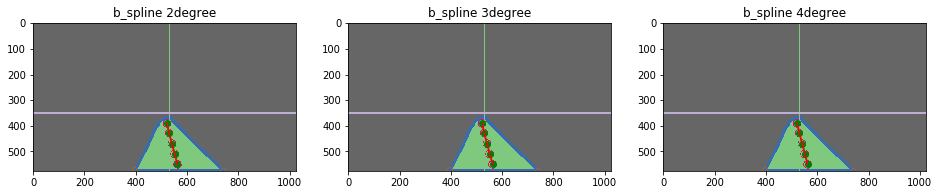

<Figure size 720x576 with 0 Axes>

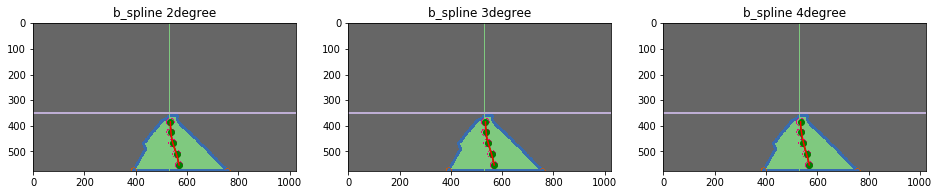

<Figure size 720x576 with 0 Axes>

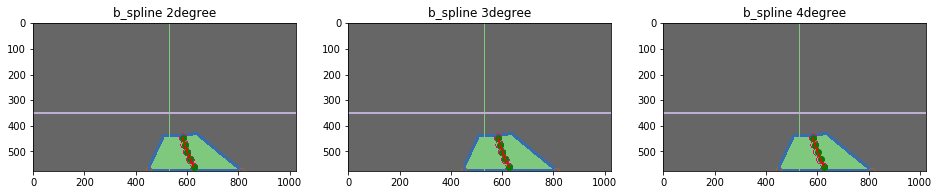

<Figure size 720x576 with 0 Axes>

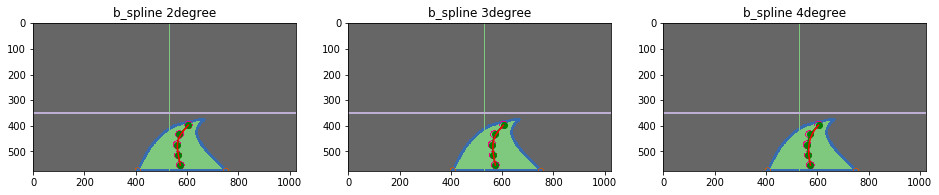

<Figure size 720x576 with 0 Axes>

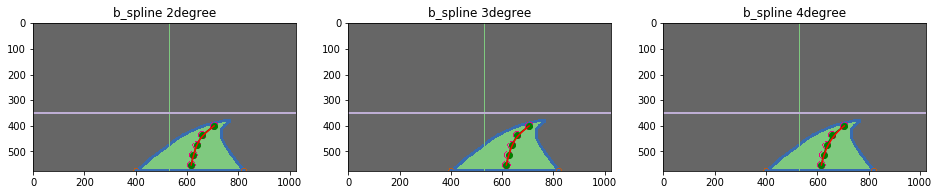

<Figure size 720x576 with 0 Axes>

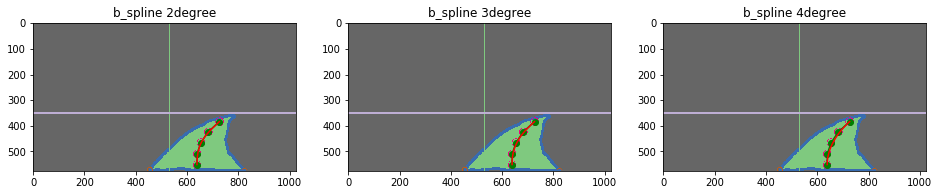

<Figure size 720x576 with 0 Axes>

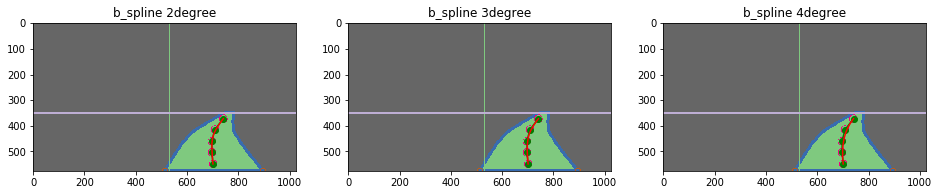

<Figure size 720x576 with 0 Axes>

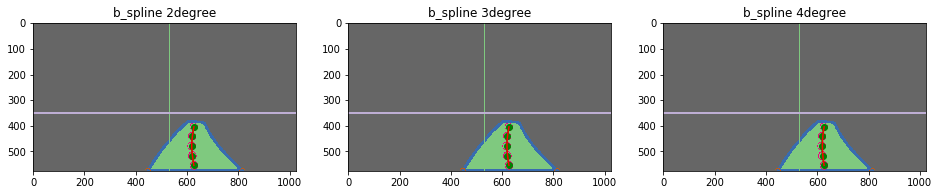

<Figure size 720x576 with 0 Axes>

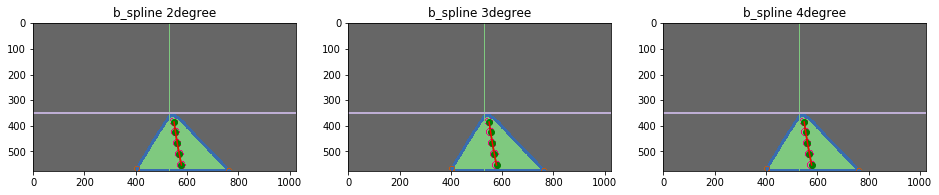

<Figure size 720x576 with 0 Axes>

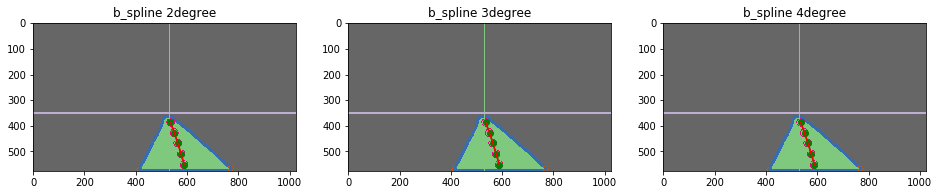

<Figure size 720x576 with 0 Axes>

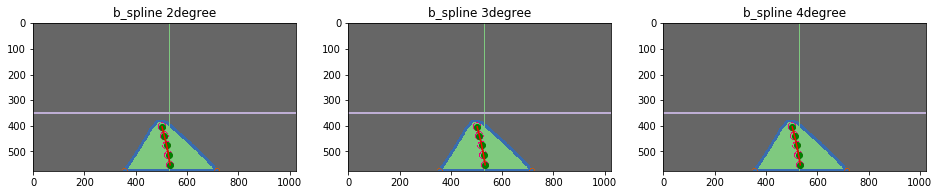

<Figure size 720x576 with 0 Axes>

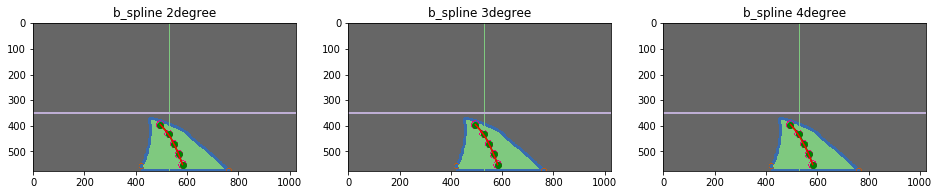

<Figure size 720x576 with 0 Axes>

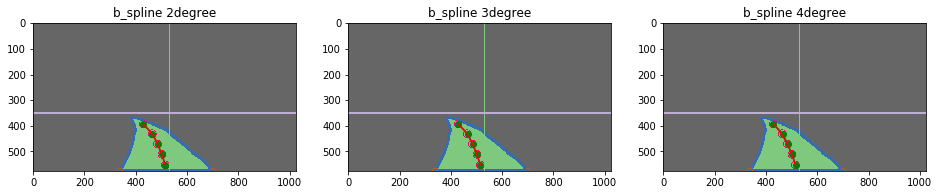

<Figure size 720x576 with 0 Axes>

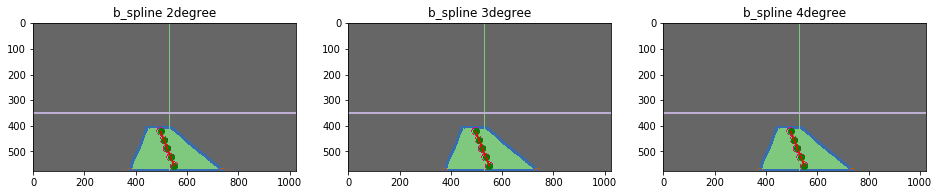

<Figure size 720x576 with 0 Axes>

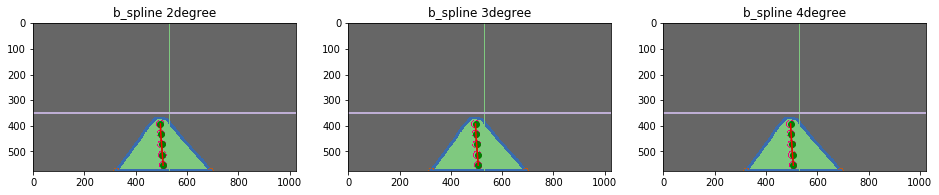

<Figure size 720x576 with 0 Axes>

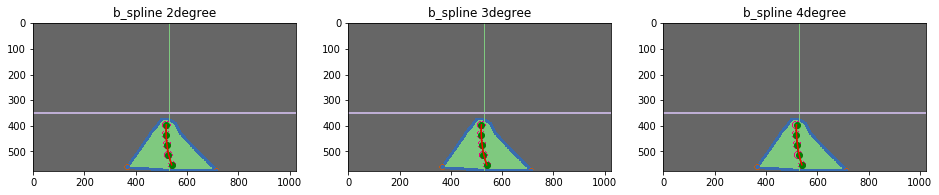

<Figure size 720x576 with 0 Axes>

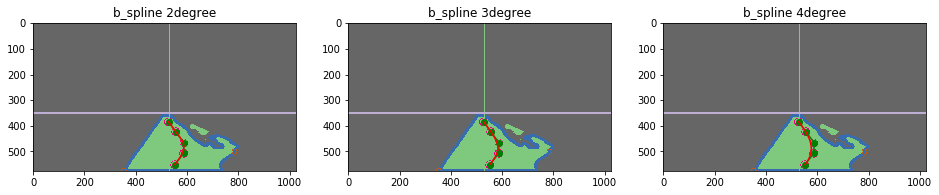

<Figure size 720x576 with 0 Axes>

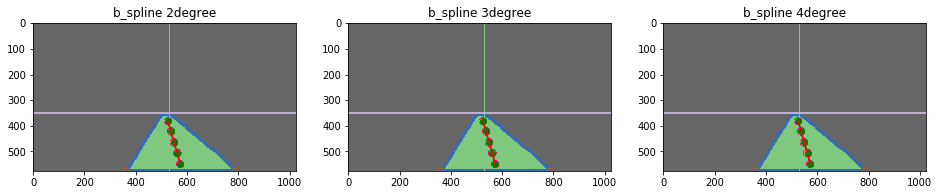

<Figure size 720x576 with 0 Axes>

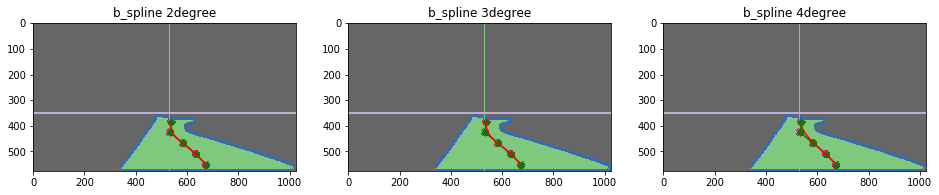

<Figure size 720x576 with 0 Axes>

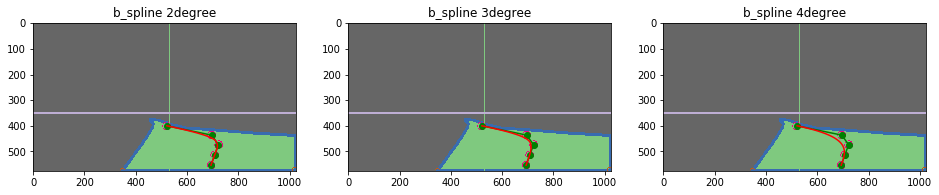

<Figure size 720x576 with 0 Axes>

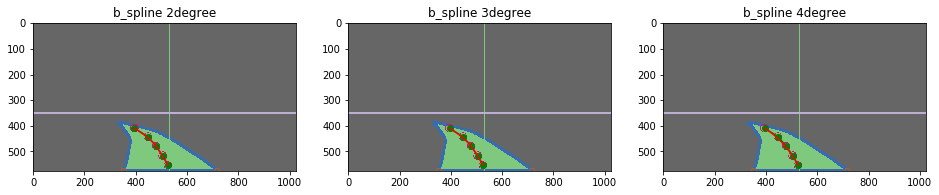

<Figure size 720x576 with 0 Axes>

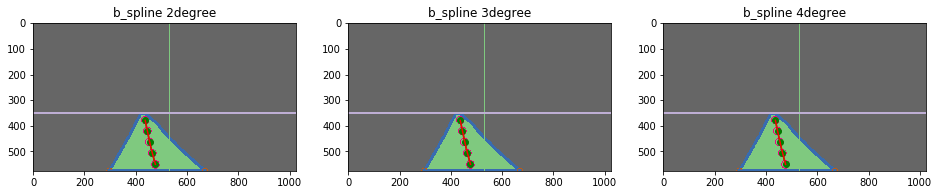

<Figure size 720x576 with 0 Axes>

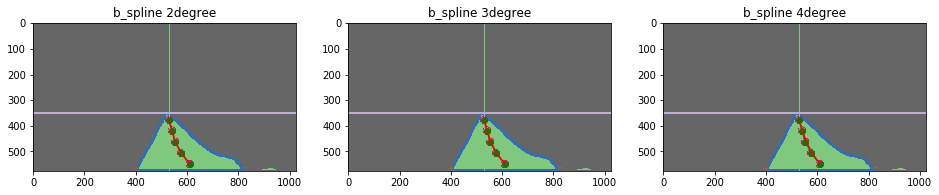

<Figure size 720x576 with 0 Axes>

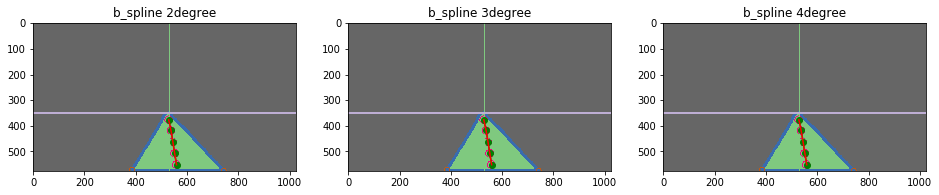

<Figure size 720x576 with 0 Axes>

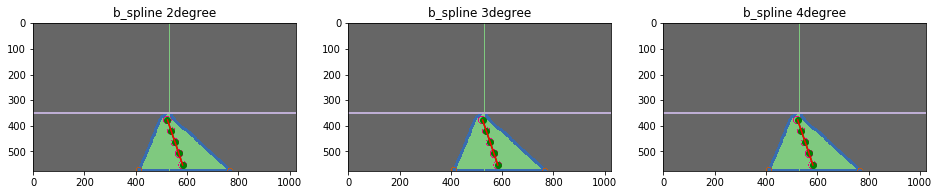

<Figure size 720x576 with 0 Axes>

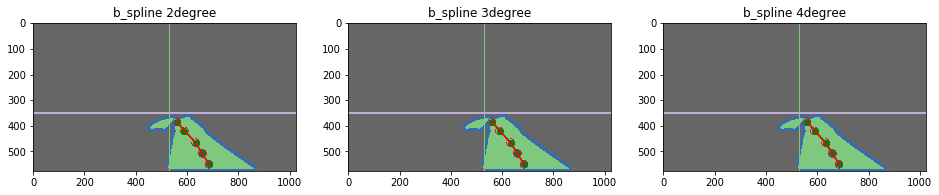

<Figure size 720x576 with 0 Axes>

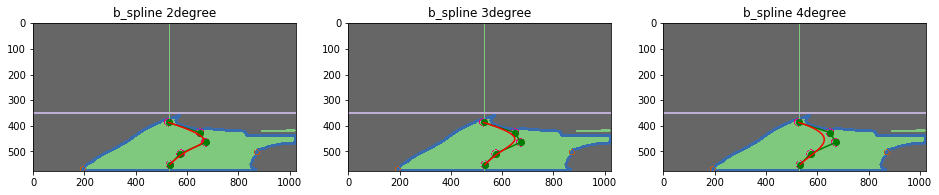

<Figure size 720x576 with 0 Axes>

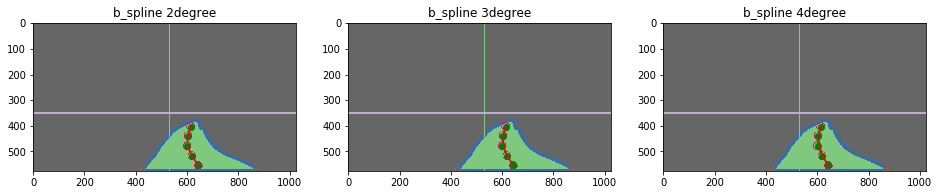

<Figure size 720x576 with 0 Axes>

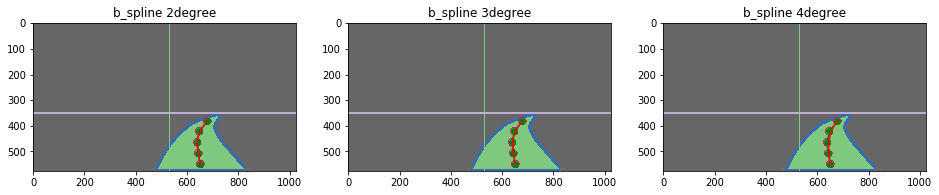

<Figure size 720x576 with 0 Axes>

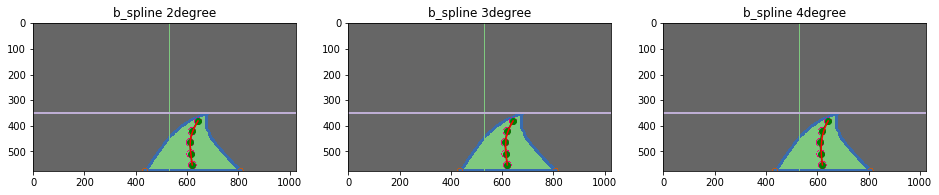

<Figure size 720x576 with 0 Axes>

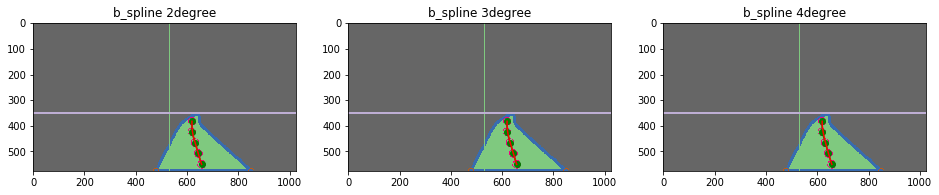

<Figure size 720x576 with 0 Axes>

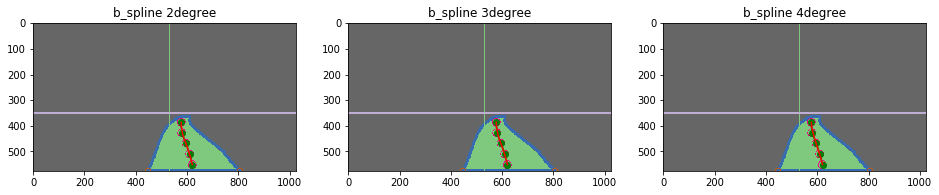

<Figure size 720x576 with 0 Axes>

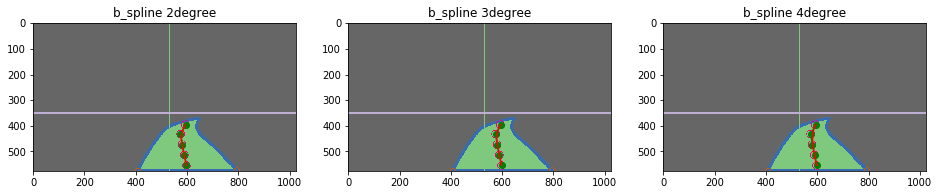

<Figure size 720x576 with 0 Axes>

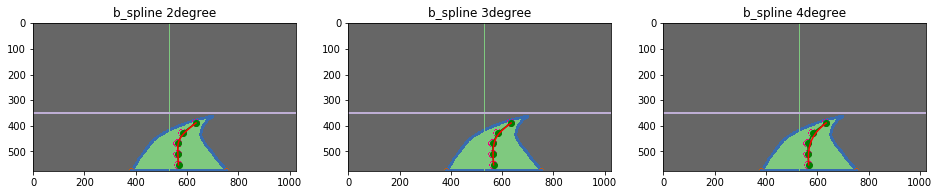

<Figure size 720x576 with 0 Axes>

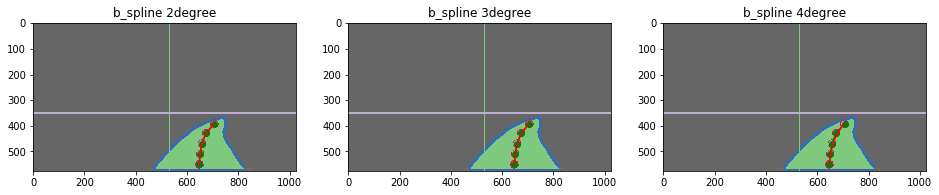

<Figure size 720x576 with 0 Axes>

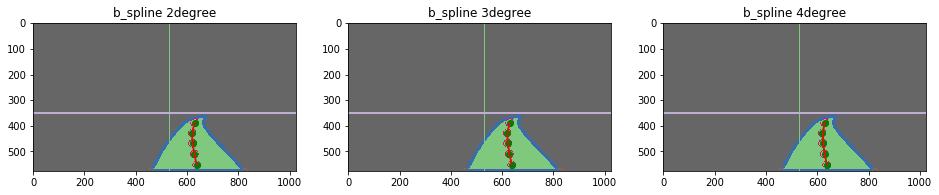

<Figure size 720x576 with 0 Axes>

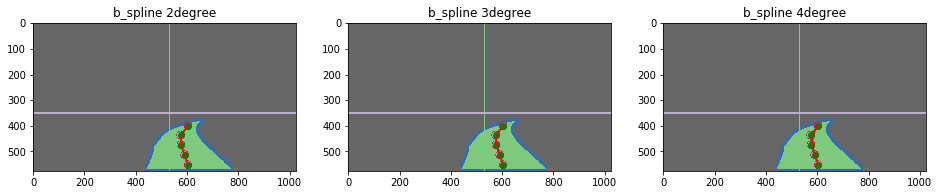

<Figure size 720x576 with 0 Axes>

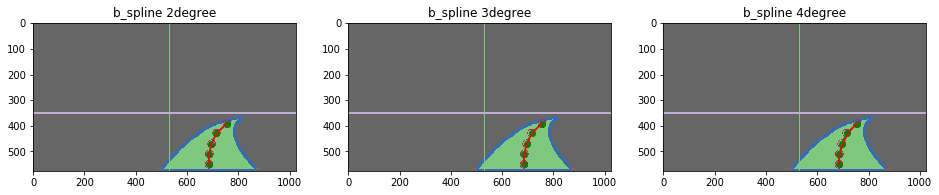

<Figure size 720x576 with 0 Axes>

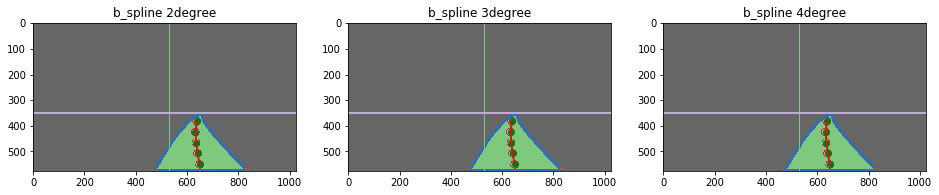

<Figure size 720x576 with 0 Axes>

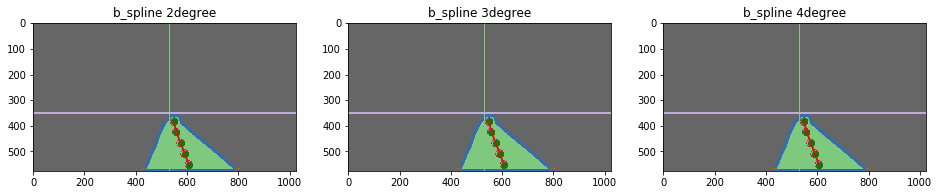

<Figure size 720x576 with 0 Axes>

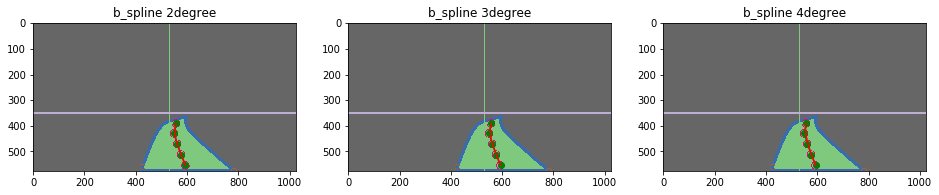

<Figure size 720x576 with 0 Axes>

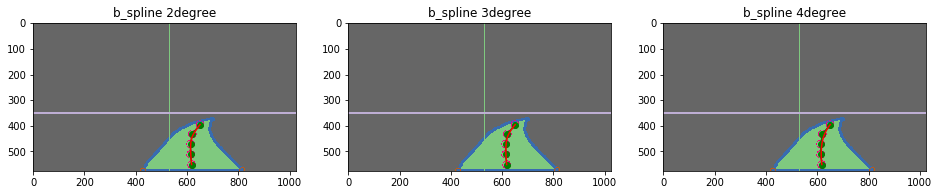

<Figure size 720x576 with 0 Axes>

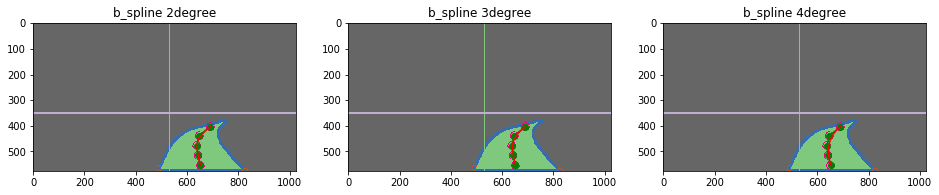

<Figure size 720x576 with 0 Axes>

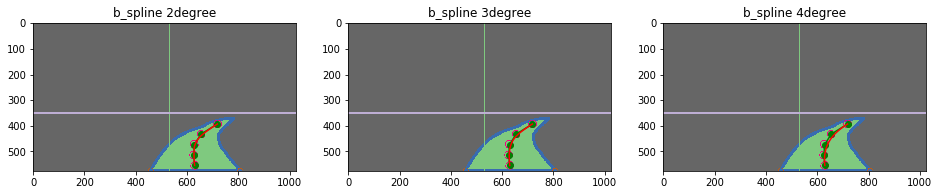

<Figure size 720x576 with 0 Axes>

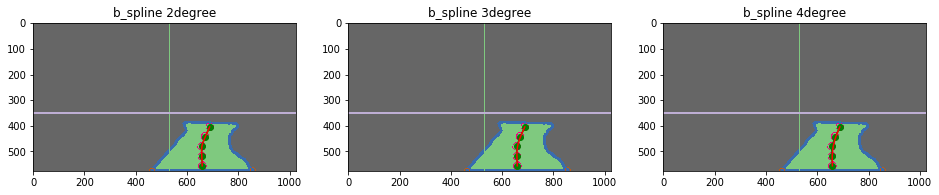

<Figure size 720x576 with 0 Axes>

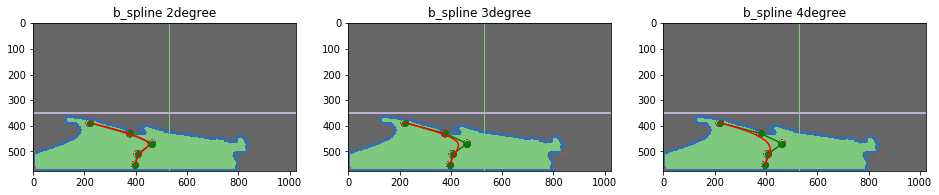

<Figure size 720x576 with 0 Axes>

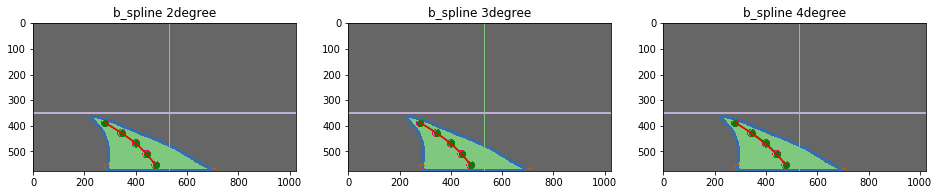

<Figure size 720x576 with 0 Axes>

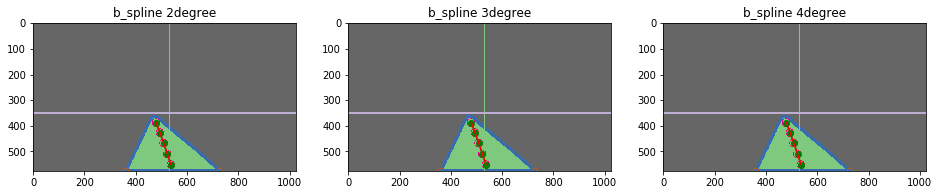

<Figure size 720x576 with 0 Axes>

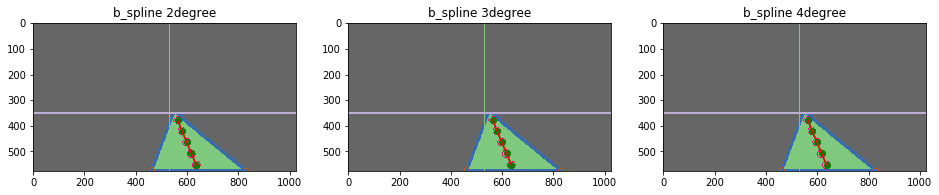

<Figure size 720x576 with 0 Axes>

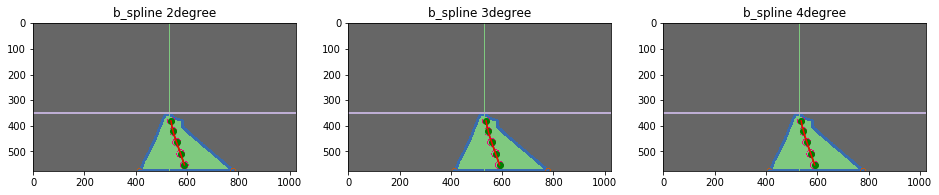

<Figure size 720x576 with 0 Axes>

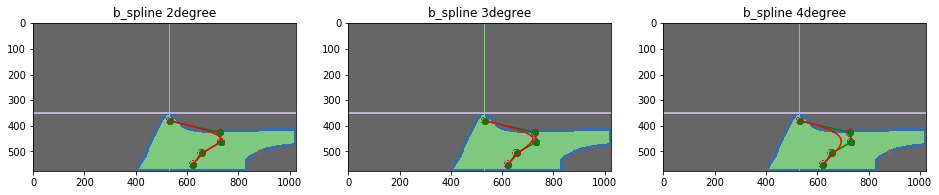

<Figure size 720x576 with 0 Axes>

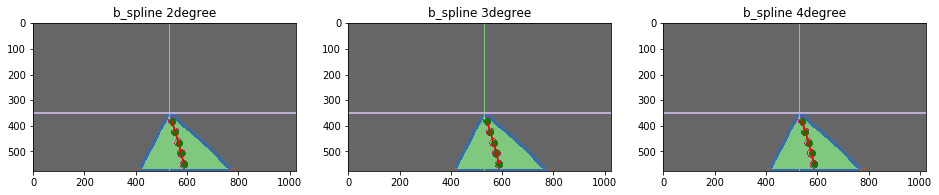

<Figure size 720x576 with 0 Axes>

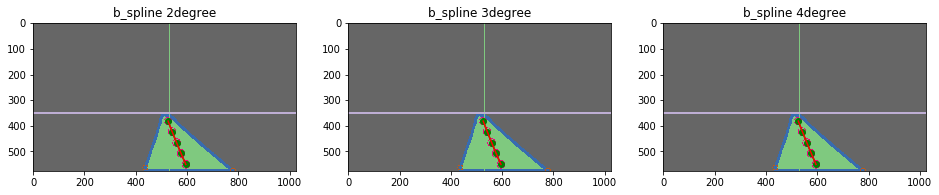

<Figure size 720x576 with 0 Axes>

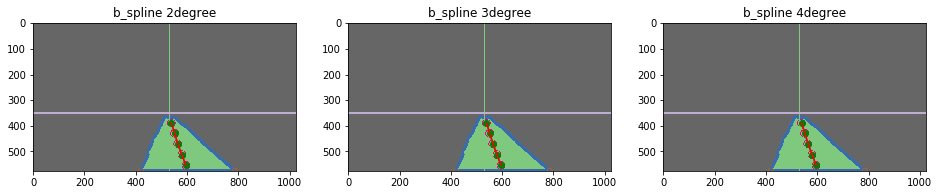

<Figure size 720x576 with 0 Axes>

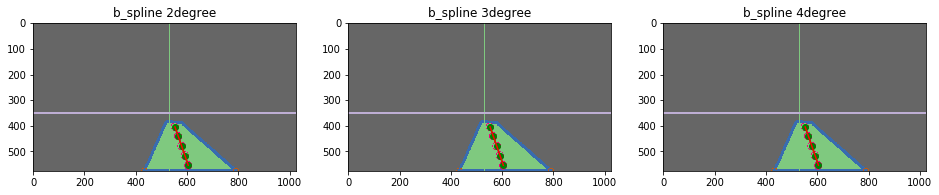

<Figure size 720x576 with 0 Axes>

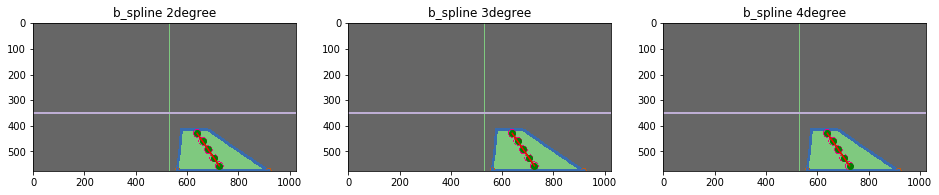

<Figure size 720x576 with 0 Axes>

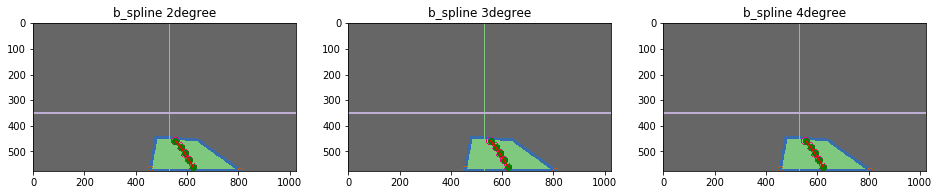

<Figure size 720x576 with 0 Axes>

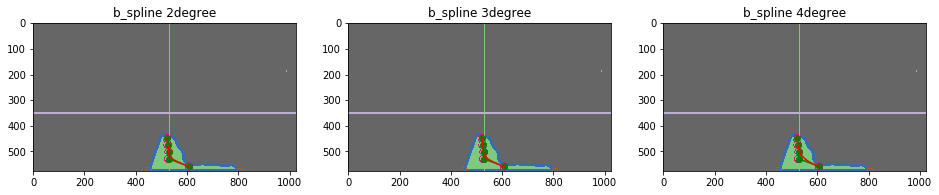

<Figure size 720x576 with 0 Axes>

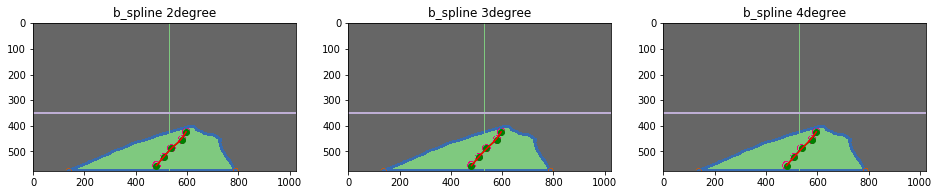

<Figure size 720x576 with 0 Axes>

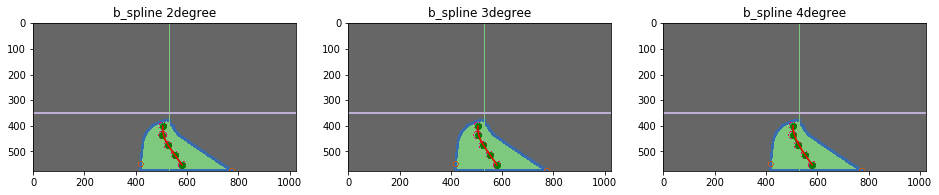

<Figure size 720x576 with 0 Axes>

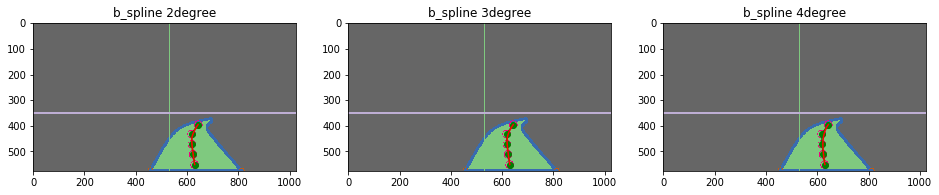

<Figure size 720x576 with 0 Axes>

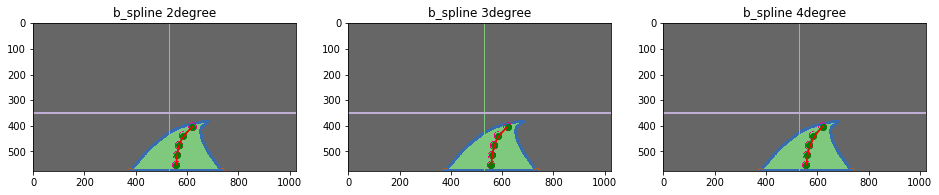

<Figure size 720x576 with 0 Axes>

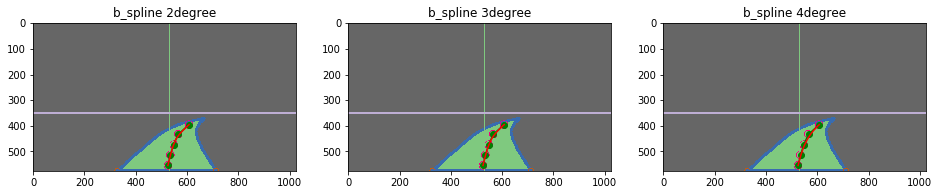

<Figure size 720x576 with 0 Axes>

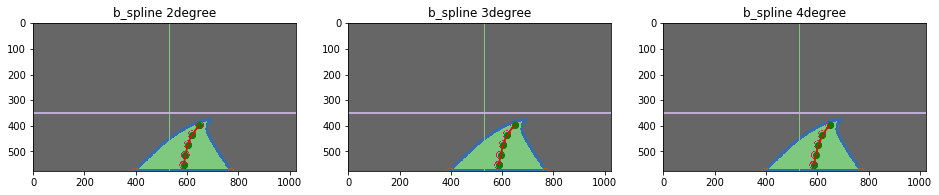

<Figure size 720x576 with 0 Axes>

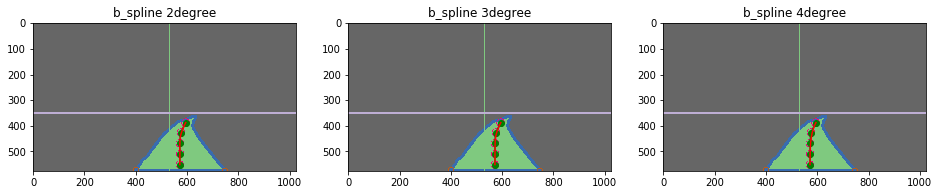

<Figure size 720x576 with 0 Axes>

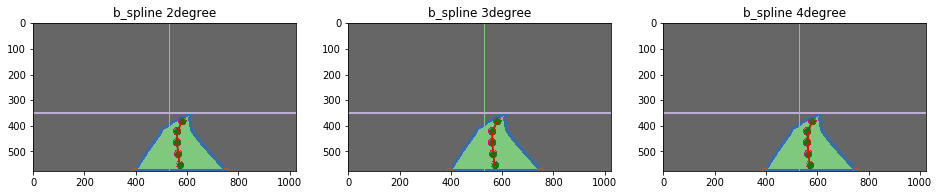

<Figure size 720x576 with 0 Axes>

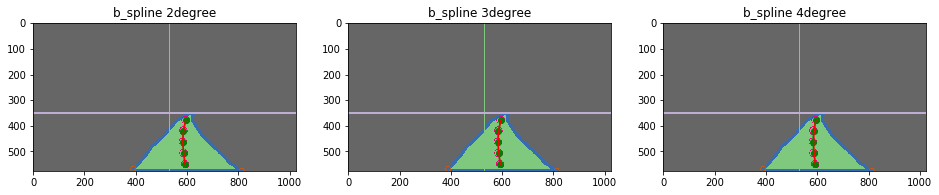

<Figure size 720x576 with 0 Axes>

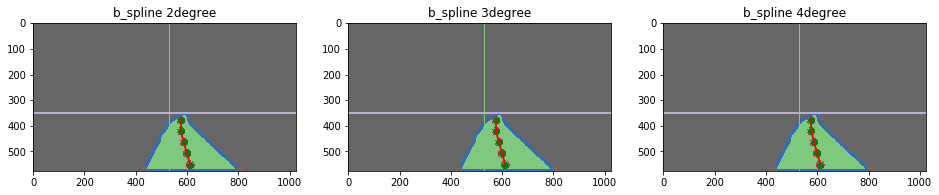

<Figure size 720x576 with 0 Axes>

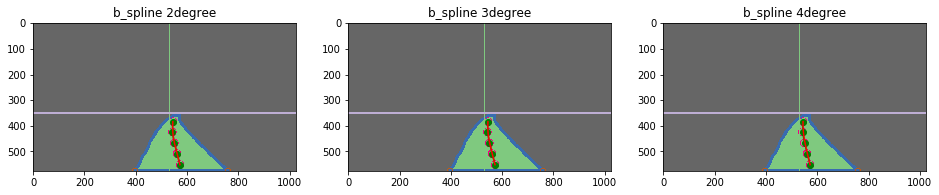

<Figure size 720x576 with 0 Axes>

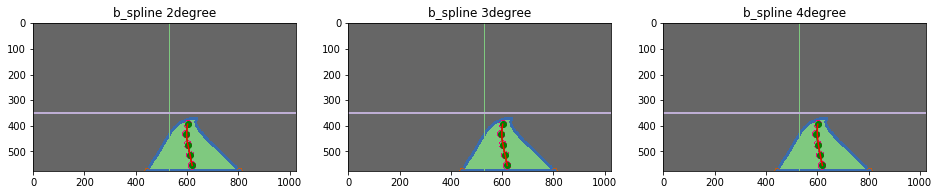

<Figure size 720x576 with 0 Axes>

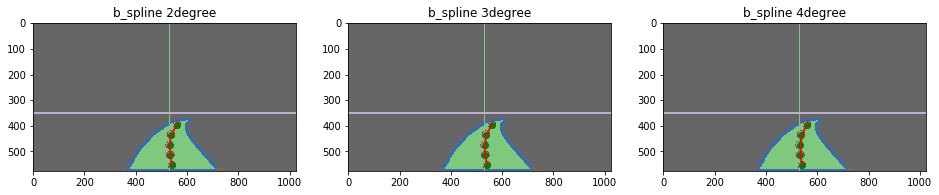

<Figure size 720x576 with 0 Axes>

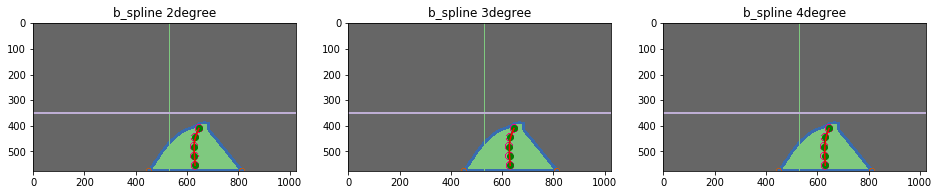

<Figure size 720x576 with 0 Axes>

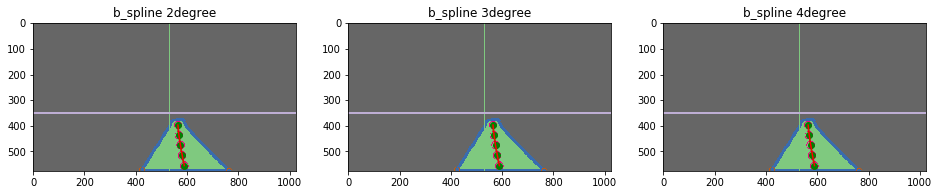

<Figure size 720x576 with 0 Axes>

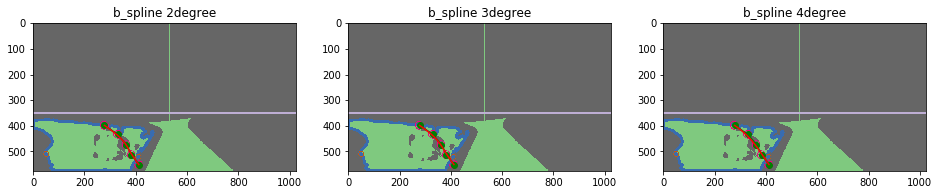

<Figure size 720x576 with 0 Axes>

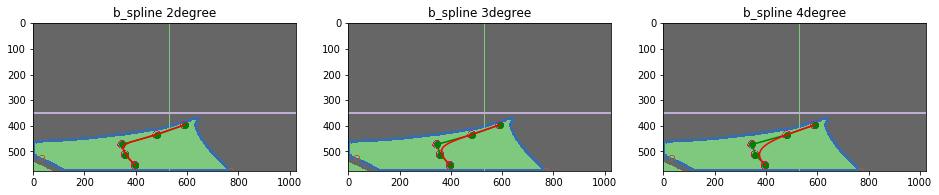

<Figure size 720x576 with 0 Axes>

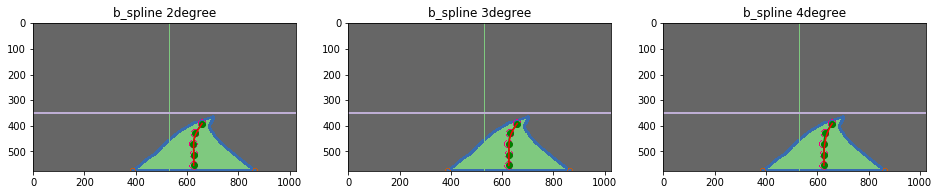

<Figure size 720x576 with 0 Axes>

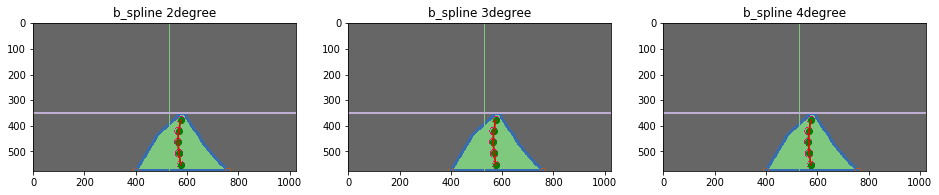

<Figure size 720x576 with 0 Axes>

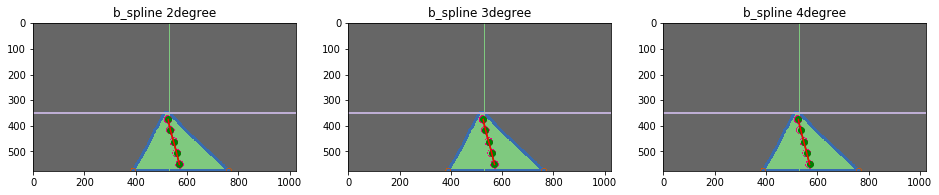

<Figure size 720x576 with 0 Axes>

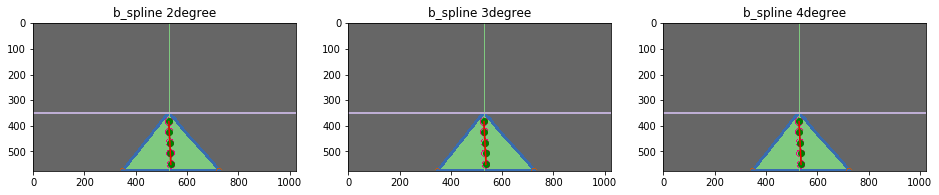

<Figure size 720x576 with 0 Axes>

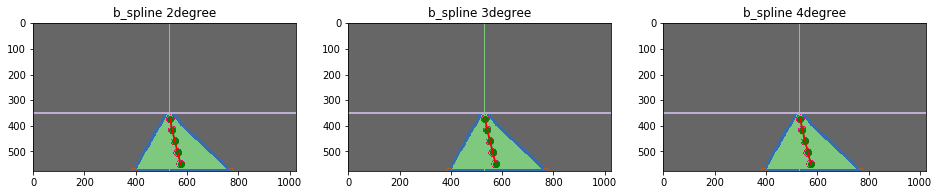

<Figure size 720x576 with 0 Axes>

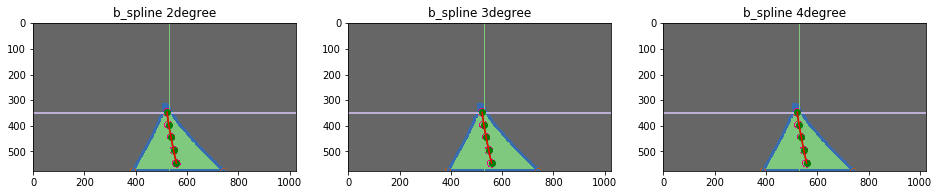

<Figure size 720x576 with 0 Axes>

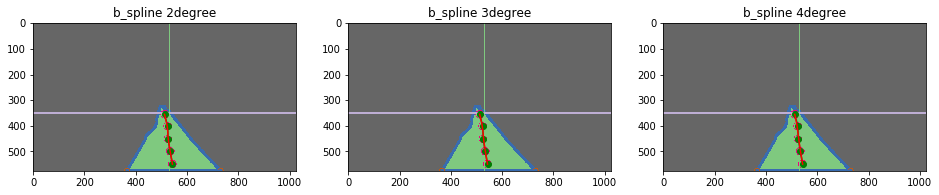

<Figure size 720x576 with 0 Axes>

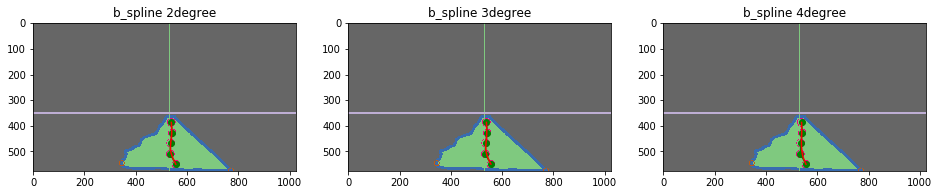

<Figure size 720x576 with 0 Axes>

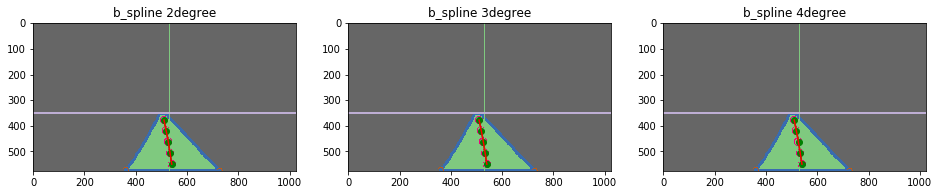

<Figure size 720x576 with 0 Axes>

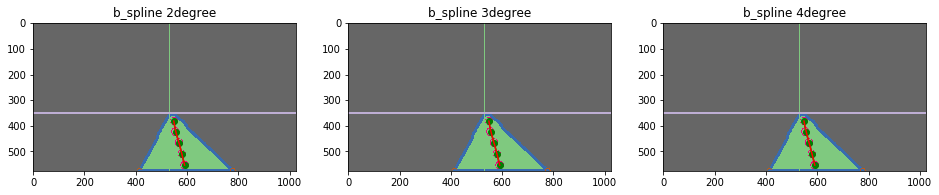

<Figure size 720x576 with 0 Axes>

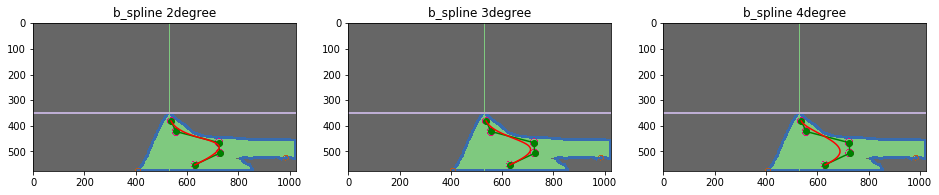

<Figure size 720x576 with 0 Axes>

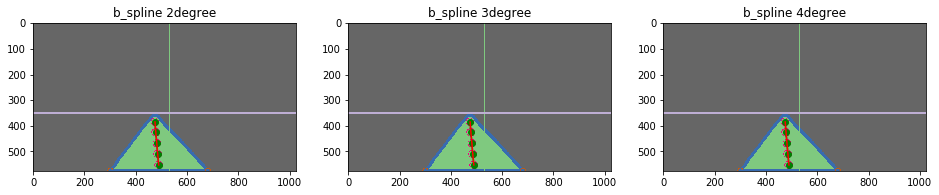

<Figure size 720x576 with 0 Axes>

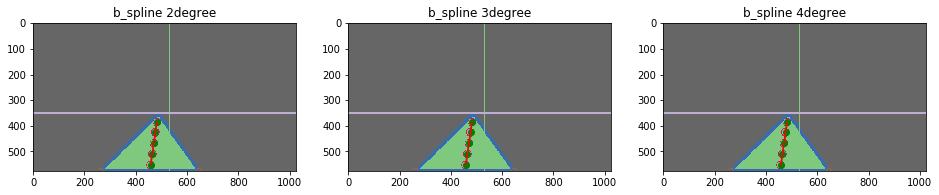

<Figure size 720x576 with 0 Axes>

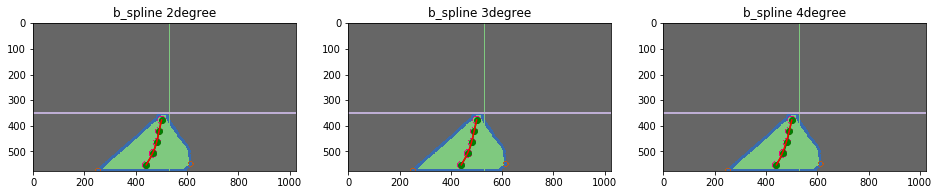

In [35]:
show_segment = False
b_spline_degree = 4

for i in range(1,147):
    
    start = time.time()
    plt.figure(figsize = (10,8))
    pred = cv2.imread(os.path.join(image_dir,'{}.jpg'.format(i)))

    pred = np.power(pred/float(np.max(pred)), 2)*255.0
    pred_max = pred[:,:,1]>=(255.0*0.6)
    pred_max  = pred_max* 255
    pred_max = pred_max.astype(np.uint8)
    
    
    
    
    
    # ---------------All -----------------
    pred_max_all = pred_max.copy()
    
    
    
    cnts = cv2.findContours(pred_max_all.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    extTop_all= np.array(c[c[:, :, 1].argmin()][0])
    
    

    
    cc = c[:,0]
    y_max = cc[:,1].max()
    y_min = cc[:,1].min()
    delta_y = (y_max - y_min) // segment
    delta = 10
    y_mid_down = y_min + delta_y
    y_mid_upper = y_max - delta_y
    
#     f,ax = plt.subplots(1,segment,figsize=(16,16))
    center_mass_list = []
    for j in range(segment):
        pred_max_segment = pred_max.copy()
        pred_max_segment[:y_min+j*delta_y,:]=0
        pred_max_segment[y_min+(j+1)*delta_y:,:]=0
        
        center_mass = np.array(ndimage.measurements.center_of_mass(pred_max_segment))
        center_mass_list.append(np.array([center_mass[1],center_mass[0]]))
#         ax[j].imshow(pred_max_segment)
    
    
    
    
    # ---------------Buttom -----------------
    pred_max_bottom = pred_max.copy() * mask
    pred_max_bottom[:VERTICAL_CROP] = 0
    cnts = cv2.findContours(pred_max_bottom.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    
    # determine the most extreme points along the contour
    extLeft_bottom = np.array(c[c[:, :, 0].argmin()][0])
    extRight_bottom = np.array(c[c[:, :, 0].argmax()][0])
    extMiddle_bottom = (extLeft_bottom + extRight_bottom) / 2
    
    
    
    
    
    
    cnts = cv2.findContours(pred_max.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    
    cv2.drawContours(pred_max, [c], -1, 100, 10)
    
    cv2.circle(pred_max, tuple(extLeft_bottom), 10, 50, 2)
    cv2.circle(pred_max, tuple(extRight_bottom), 10, 50, 2)
    
    
    for cm in center_mass_list:
        cv2.circle(pred_max, tuple(cm.astype(int)), 15, 80, 2)
    
    
    
    
    
    """Plot an example bezier curve."""
    start_x = float(extMiddle_bottom[0])  # [m]
    start_y = float(extMiddle_bottom[1])  # [m]
    
    diff = (center_mass_list[-1][0]-start_x,center_mass_list[-1][1]-start_y)
    angle = np.angle([diff[0]+diff[1]*1j])[0]
    start_yaw = angle  # [rad]

    
    
    end_x = float(extTop_all[0])  # [m]
    end_y = extTop_all[1]  # [m]
    
    diff = (end_x - center_mass_list[0][0],end_y - center_mass_list[0][1])
    angle_ = np.angle([diff[0]+diff[1]*1j])[0]
    end_yaw = angle_  # [rad]
    offset = 3.0

    

    
    
    
    path, control_points = calc_4points_bezier_path(
        start_x, start_y, start_yaw, end_x, end_y, end_yaw, offset)
    
    
    
    cv2.line(pred_max, (base_point[0], 0), base_point,255,2)
    cv2.line(pred_max,(0,horizon),(1023,horizon),200,3)
    
    # ----------------------bezier line -----------------------------
    n_course_point = 100  # sampling number
    waypoint_x = list(np.array(center_mass_list)[:,0])
    waypoint_y = list(np.array(center_mass_list)[:,1])
    
    f,ax = plt.subplots(1,3,figsize=(16,16))
    for k in range(3):
        rax, ray = approximate_b_spline_path(waypoint_x, waypoint_y,n_course_point,degree=k+2)
   

        # ----------------------plt Image -----------------------------
        ax[k].imshow(pred_max,cmap=plt.cm.Accent_r)




        # bs line
        ax[k].set_title('b_spline {}degree'.format(k+2))
        ax[k].imshow(pred_max,cmap=plt.cm.Accent_r)
        ax[k].plot(waypoint_x, waypoint_y, '-og', label="way points")
        ax[k].plot(rax, ray, '-r', label="Approximated B-Spline path")
    
    

    
    
    
    
    
    
    
    # ----------------------Cubic Apline -----------------------------
#     ds = 0.1  # [m] distance of each intepolated points

#     sp = Spline2D(waypoint_x, waypoint_y)
#     s = np.arange(0, sp.s[-1], ds)

#     rx, ry, ryaw, rk = [], [], [], []
#     for i_s in s:
#         ix, iy = sp.calc_position(i_s)
#         rx.append(ix)
#         ry.append(iy)
#         ryaw.append(sp.calc_yaw(i_s))
#         rk.append(sp.calc_curvature(i_s))
        
        
    
    
    
#     # ----------------------plt Image -----------------------------
#     f,ax = plt.subplots(1,3,figsize=(16,16))
#     ax[0].imshow(pred_max,cmap=plt.cm.Accent_r)
    
    
#     # bezier line
#     ax[0].set_title('bezier')
#     ax[0].plot(path.T[0], path.T[1],'-r', label="Bezier Path")
#     ax[0].plot(control_points.T[0], control_points.T[1],
#             '-og', label="Control Points")
    
#     # bs line
#     ax[1].set_title('b_spline')
#     ax[1].imshow(pred_max,cmap=plt.cm.Accent_r)
#     ax[1].plot(waypoint_x, waypoint_y, '-og', label="way points")
#     ax[1].plot(rax, ray, '-r', label="Approximated B-Spline path")
    
    
#     ax[2].imshow(pred_max,cmap=plt.cm.Accent_r)
#     ax[2].set_title('cubic_spline')
#     ax[2].plot(waypoint_x, waypoint_y, "xb", label="input")
#     ax[2].plot(rx, ry, "-r", label="spline")

    
    plt.show()

In [ ]:
np.array(ran)

In [ ]:
plt.imshow(pred_max_segment)

In [ ]:
list(np.array(center_mass_list)[:,0])

In [ ]:
center_mass

In [ ]:
start_x

In [ ]:
np.where(np.logical_and(cc[:,1]>y_mid_down-delta , cc[:,1]<y_mid_down + delta))

In [ ]:
cc

In [ ]:
cc[0,:]>0

In [ ]:
cc[:,:]


In [ ]:
pred_max.dtype

In [ ]:

plt.imshow(mask)

In [ ]:
mask[mask>254] = 255
plt.imshow(mask)

In [ ]:
cv2.imwrite('mask.jpg',mask)